## Статистика + Временные ряды. Задание 3

**Правила:**


* Выполненную работу нужно отправить [телеграм-боту](https://t.me/miptstats_x5_bot).
* Дедлайн **10.11.2021 в 12:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Теоретическую часть можно оформить в ноутбуке или же прислать боту фотографии
* Если вы прикрепляете фотографии к ноутбуку, убедитесь, что они "вшиты" туда, а не ссылаются на локальный путь
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него.
* За задание можно получить до **20 баллов**.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

### Задача Т1 (2 балла)

Даны двумерные точки, их координаты заданы в виде python-списка в коде. Пусть про один из элементов известно, что он является выбросом.

In [ ]:
points = [
    [1, 3],
    [2, 1],
    [3, 2],
    [3, 5],
    [6, 2],
    [9, 7] # выброс
]

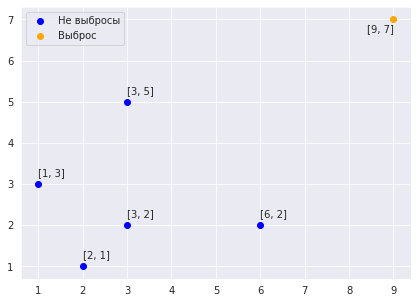

In [ ]:
points = np.array(points)

sns.set_style('darkgrid')
plt.figure(figsize=(7, 5))
plt.scatter(points[:-1, 0], points[:-1, 1], c='blue', label='Не выбросы')
plt.scatter(points[-1:, 0], points[-1:, 1], c='orange', label='Выброс')

for i in range(points.shape[0] - 1):
    plt.annotate(str(points[i].tolist()), (points[i, 0], points[i, 1] + 0.2))
plt.annotate(str(points[-1].tolist()), (points[-1, 0] - 0.6, points[-1, 1] - 0.3))

    
plt.legend()
plt.show()

Посчитайте вероятность того, что в дереве Isolation Forest в первом же узле выделенный элемент будет отделён от всех остальных. Вычисления можете произвести в коде. Обоснование обязательно.

$$ x_{min} = y_{min} = 1 $$

$$ x_{max} = 9 \\ y_{max} = 7 $$

$$ P = \frac{1}{2} \cdot P_x + \frac{1}{2} \cdot P_y $$

$$ \frac{1}{2} \cdot \frac{9-6}{8} + \frac{1}{2} \cdot \frac{7-5}{6} = \frac{3}{16} + \frac{2}{12} = \frac{9 + 8}{48} = \frac{17}{48} $$

Посчитайте вероятность того, что в дереве RRCF в первом же узле выделенный элемент будет отделён от всех остальных. Вычисления можете произвести в коде. Обоснование обязательно.

### Задача Т2 (4 балла)

Рассмотрим задачу скорейшего определения разладки. Пусть $\mathsf{P}_\infty$ и $\mathsf{P}_0$ соответствуют нормальным распределениям $\mathcal{N}(a_\infty, \sigma^2)$ и $\mathcal{N}(a_0, \sigma^2)$.

Для статистики CUSUM выразите $T_n$ через $T_{n - 1}$, $X_n$ и параметры распределений.

Для статистики Ширяева-Робертса выразите $\psi_n$ через $\psi_{n - 1}$, $X_n$ и параметры распределений.

Вычислите $\mathsf{E}_\infty \zeta_n$ и $\mathsf{E}_0 \zeta_n$, где $\zeta_n$ = $\log\frac{f_0(X_n)}{f_\infty(X_n)}$.

*Подсказка*: конечные формулы были в презентации.

### Задача 1 (7 баллов)

Одна из важных задач банковских организаций — распознавание мошеннических операций с кредитными картами, например, чтобы клиенты не платили за те операции, которые они не совершают.  

**Данные**

Скачайте данные https://www.kaggle.com/mlg-ulb/creditcardfraud

Набор данных содержит информацию о транзакциях, совершенных европейцами в сентябре 2013 года за два дня. Среди 284 807 транзакций 492 являются мошенническими. Как видно, данные сильно несбалансированы, поскольку неправомерные операции составляют всего 0.172% всех транзакций.  

**Признаки**

Подчекнем важную особенность данных &mdash; колонки `V1, ..., V28` содержат только вещественные значения, которые являются результатом PCA-трансформации над реальными данными. Реальные данные не предоставлены для выполнения условия конфидицальности клиентов банков. Есть еще 2 признака, которые не были подвергнуты трансформации: `Time` — время в секундах между каждой транзакцией и первой транзакцией в датасете, и `Amount` — количество денег, участвующих в транзакции.

**Таргет**

`Class` — принимает значение 1 в случае мошенничества, 0 — иначе.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, f1_score, roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/Anomalies/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


#### Ситуация 1: анализ полученных данных  

Предположим, нам не известно то, какие операции являются мошенническими.

Примените изученные методы детектирования *выбросов* для поиска мошеннических операций. Параметр `contamination` можете ограничить значениями 0.001 и 0.005. Тщательного подбора гиперпарметров не требуется. 

Не забудьте произвести нормализацию признаков. Используйте `RobustScaler` из `sklearn`, поскольку, возможно не все операции, которые отмечены как не мошеннические, действительно легальные. Поясните почему нормализация необходима.

In [ ]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler

Для оценки качества каждого метода посчитайте значения нескольких метрик качества классификации и запишите значения в таблицу. Поясните, почему вы выбрали эти метрики. 

In [ ]:
scores = pd.DataFrame(columns=["method", "roc_auc_score", "precision_score", "f1_score"])

In [ ]:
transformer = RobustScaler().fit(df[["Amount"]])
X = transformer.transform(df[["Amount"]])

In [ ]:
clf = IsolationForest(contamination = "auto", n_estimators=200, random_state=10).fit(X)
pred_IF = clf.predict(X)

In [ ]:
pred_IF = np.where(pred_IF == 1, 0, pred_IF)
pred_IF = np.where(pred_IF == -1, 1, pred_IF)
pred_IF

array([1, 0, 1, ..., 0, 0, 1])

In [ ]:
scores.loc[len(scores)] = ["IsolationForest", roc_auc_score(df[["Class"]], pred_IF), precision_score(df["Class"], pred_IF), f1_score(df["Class"], pred_IF)]
scores

,method,roc_auc_score,precision_score,f1_score
0,IsolationForest,0.526547,0.002277,0.004508


In [ ]:

from sklearn.neighbors import LocalOutlierFactor
lof = LocalOutlierFactor(contamination=0.1, n_neighbors=10)
pred_LOF = lof.fit_predict(X)

In [ ]:
pred_LOF = np.where(pred_LOF == 1, 0, pred_LOF)
pred_LOF = np.where(pred_LOF == -1, 1, pred_LOF)
pred_LOF

array([1, 0, 1, ..., 0, 0, 0])

In [ ]:
scores.loc[len(scores)] = ["LocalOutlierFactor", roc_auc_score(df[["Class"]], pred_LOF), precision_score(df["Class"], pred_LOF), f1_score(df["Class"], pred_LOF)]
scores

,method,roc_auc_score,precision_score,f1_score
0,IsolationForest,0.526547,0.002277,0.004508
1,LocalOutlierFactor,0.523210,0.002528,0.004970


In [ ]:
from sklearn.cluster import DBSCAN

In [ ]:
# db = DBSCAN(eps=2, min_samples=10)
# preds = db.fit_predict(X)
#Работает очень медленно !!!

Сделайте выводы.

В качестве метрик были выбраны roc_auc, f1_score и precision_score, так как классы сильно несбалансированы. Наилучший результат показал LocalOutlierFactor. Выбросы имеют существенно меньшую плотность, чем её соседи. Путём сравнения локальной плотности объекта с локальной плотностью его соседей LocalOutlierFactor выделяет такие точки

#### Ситуация 2: построение модели распознавания новых мошеннических схем 
Теперь рассмотрим методы детектирования новизны.  

Разделите выборку на две части следующим образом:  
* в первой части данных 50000 легальных транзакций, мошеннических нет, это будет трейн;  
* во второй части данных все остальные данные, это будет тест.

*Внимание.* Нельзя использовать мошеннические операции при обучении или выборе модели. Этих данных нет при построении модели, они появятся потом. Когда они появятся, ваша модель должна быть уже готова их задетектировать.

Нормализуйте данные по трейну. Используйте `RobustScaler` из `sklearn`, поскольку, возможно не все операции, которые отмечены как не мошеннические, действительно легальные.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/Anomalies/creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [ ]:
df_train = df[df["Class"] == 0].iloc[:50000]
df_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50143,44365.0,-3.224746,-2.998191,1.057410,-0.383791,2.371251,-2.555248,-0.466743,-0.174468,-1.663722,0.310368,-0.105223,0.325527,0.972438,0.123689,0.202552,-1.815308,0.081813,0.280714,-1.861104,-0.198483,-0.177121,-0.357907,0.773016,0.410288,0.454601,0.394950,-0.248317,0.547385,108.29,0
50144,44366.0,1.256930,1.257145,-2.137242,1.150296,1.858117,-0.227316,0.655016,-0.087353,-0.812141,-1.461720,1.744709,0.529334,1.283521,-3.491245,0.580640,1.275852,2.167172,1.665395,-0.403090,0.070871,-0.205265,-0.423718,-0.375583,-1.631564,0.979428,-0.202036,0.059126,0.072480,1.75,0
50145,44367.0,1.263956,-1.807915,1.707656,-0.866744,-2.643249,0.367284,-2.061318,0.377801,-0.479473,1.242206,0.332807,-0.129725,-0.739056,-1.139753,-2.131581,-0.758677,1.027305,0.532865,0.429954,-0.327047,-0.137037,0.237708,-0.030778,0.539401,0.261369,-0.076180,0.092854,0.030832,56.00,0
50146,44367.0,1.199514,0.184541,0.376375,0.641618,-0.569036,-0.906911,-0.132476,0.030489,0.025513,-0.061990,1.514125,0.054502,-1.654750,0.271382,0.571648,0.698132,-0.081580,0.345660,0.026691,-0.190865,-0.243325,-0.823713,0.163949,0.447194,0.099635,0.070345,-0.037963,0.018770,0.89,0


In [ ]:
df_test = df[~df.index.isin(df_train.index)]
df_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,-2.772272,3.202033,-2.899907,-0.595222,-4.289254,0.389724,-1.140747,-2.830056,-0.016822,0.416956,0.126911,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,-0.838587,-0.414575,-0.503141,0.676502,-1.692029,2.000635,0.666780,0.599717,1.725321,0.283345,2.102339,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,-1.525412,2.032912,-6.560124,0.022937,-1.470102,-0.698826,-2.282194,-4.781831,-2.615665,-1.334441,-0.430022,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,-4.801637,4.895844,-10.912819,0.184372,-6.771097,-0.007326,-7.358083,-12.598419,-5.131549,0.308334,-0.171608,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,-2.447469,2.101344,-4.609628,1.464378,-6.079337,-0.339237,2.581851,6.739384,3.042493,-2.721853,0.009061,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,-1.593105,2.711941,-0.689256,4.626942,-0.924459,1.107641,1.991691,0.510632,-0.682920,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,-0.150189,0.915802,1.214756,-0.675143,1.164931,-0.711757,-0.025693,-1.221179,-1.545556,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,0.411614,0.063119,-0.183699,-0.510602,1.329284,0.140716,0.313502,0.395652,-0.577252,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,-1.933849,-0.962886,-1.042082,0.449624,1.962563,-0.608577,0.509928,1.113981,2.897849,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


Обучите на трейне `OneClassSVM` из `sklearn`

In [ ]:
from sklearn.svm import OneClassSVM
clf = OneClassSVM(gamma='auto').fit(df_train)

Получите результат на тесте и посчитайте метрики качества классификации модели.

In [ ]:
preds_SVM = clf.predict(df_test)

In [ ]:
preds_SVM.max()

-1

In [ ]:
print("roc_auc_score: ", roc_auc_score(df_test[["Class"]], preds_SVM))

roc_auc_score:  0.5


OneClassSVM не нашел новизны среди данных

### Задача 2 (7 баллов)

Скачайте данные о зарегистрированных случаях COVID-19 в различных странах с GitHub: <a href="https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv">link</a>. Загрузите его в DataFrame через pandas.

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/data/Anomalies/time_series_covid19_confirmed_global.csv")
df

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,9/25/21,9/26/21,9/27/21,9/28/21,9/29/21,9/30/21,10/1/21,10/2/21,10/3/21,10/4/21,10/5/21,10/6/21,10/7/21,10/8/21,10/9/21,10/10/21,10/11/21,10/12/21,10/13/21,10/14/21,10/15/21,10/16/21,10/17/21,10/18/21,10/19/21,10/20/21,10/21/21,10/22/21,10/23/21,10/24/21,10/25/21,10/26/21,10/27/21,10/28/21,10/29/21,10/30/21,10/31/21,11/1/21,11/2/21,11/3/21
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,154960,154960,155072,155093,155128,155174,155191,155191,155191,155287,155309,155380,155429,155448,155466,155508,155540,155599,155627,155682,155688,155739,155764,155776,155801,155859,155891,155931,155940,155944,156040,156071,156124,156166,156196,156210,156250,156284,156307,156323
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,167354,167893,168188,168782,169462,170131,170778,171327,171794,171794,172618,173190,173723,174168,174643,174968,175163,175664,176172,176667,177108,177536,177971,178188,178804,179463,180029,180623,181252,181696,181960,182610,183282,183873,184340,184887,185300,185497,186222,186793
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,202574,202722,202877,203045,203198,203359,203517,203657,203789,203915,204046,204171,204276,204388,204490,204597,204695,204790,204900,205005,205106,205199,205286,205364,205453,205529,205599,205683,205750,205822,205903,205990,206069,206160,206270,206358,206452,206566,206649,206754
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,15167,15167,15189,15192,15209,15222,15222,15222,15222,15267,15271,15284,15288,15291,15291,15291,15307,15307,15314,15326,15338,15338,15338,15367,15369,15382,15382,15404,15404,15404,15425,15425,15462,15505,15516,15516,15516,15516,15516,15572
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,54795,55121,55583,56040,56583,56583,58076,58603,58943,58943,59895,60448,60803,61023,61245,61378,61580,61794,62143,62385,62606,62789,62842,63012,63197,63340,63567,63691,63775,63861,63930,64033,64126,64226,64301,64374,64433,64458,64487,64533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275,NaN,Vietnam,14.058324,108.277199,0,2,2,2,2,2,2,2,2,2,6,6,8,8,8,10,10,13,13,14,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,...,746678,756689,766051,770640,779398,790755,797712,803202,808578,813961,818324,822687,826837,831643,836134,839662,843281,846230,849691,853842,857639,860860,864053,867221,870255,873901,877537,881522,884895,888940,892579,896174,900585,905477,910376,915603,921122,926720,932357,939463
276,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,395677,396746,398946,400649,402255,403716,405056,405780,406652,408211,409489,439845,440936,441882,441882,441882,443766,444729,445538,446294,447032,447032,447032,448322,449031,449705,449980,450310,450310,450310,451459,451897,452272,452642,452997,452997,452997,453782,454172,454509
277,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,8891,8934,8988,9016,9039,9067,9111,9139,9139,9214,9234,9271,9299,9333,9345,9369,9402,9412,9439,9467,9495,9512,9526,9556,9575,9596,9635,9650,9662,9678,9694,9711,9728,9751,9773,9779,9791,9799,9806,9810
278,NaN,

Аналогично семинару визуализируйте для Израиля и России следующие временные ряды:

* общее количество зафиксированных случаев на каждый день
* количество новых случаев за каждый день
* разницу в количестве новых случаев с предыдущим днём

In [ ]:
df = df[(df["Country/Region"] == "Israel") | (df["Country/Region"] == "Russia")]

In [ ]:
df_russia = df[df["Country/Region"] == "Russia"].transpose().drop(["Province/State", "Lat", "Long", "Country/Region"], axis=0)
df_russia["time"] = df_russia.index
df_russia = df_russia.rename(columns = {217 : "count"})
df_russia["Country/Region"] = "Russia"
df_russia

,count,time,Country/Region
1/22/20,0,1/22/20,Russia
1/23/20,0,1/23/20,Russia
1/24/20,0,1/24/20,Russia
1/25/20,0,1/25/20,Russia
1/26/20,0,1/26/20,Russia
...,...,...,...
10/30/21,8338053,10/30/21,Russia
10/31/21,8377984,10/31/21,Russia
11/1/21,8417305,11/1/21,Russia
11/2/21,8455232,11/2/21,Russia


In [ ]:
df_israel = df[df["Country/Region"] == "Israel"].transpose().drop(["Province/State", "Lat", "Long", "Country/Region"], axis=0)
df_israel["time"] = df_israel.index
df_israel = df_israel.rename(columns = {152 : "count"})
df_israel["Country/Region"] = "Israel"
df_israel

,count,time,Country/Region
1/22/20,0,1/22/20,Israel
1/23/20,0,1/23/20,Israel
1/24/20,0,1/24/20,Israel
1/25/20,0,1/25/20,Israel
1/26/20,0,1/26/20,Israel
...,...,...,...
10/30/21,1327126,10/30/21,Israel
10/31/21,1327458,10/31/21,Israel
11/1/21,1328218,11/1/21,Israel
11/2/21,1331597,11/2/21,Israel


In [ ]:
df1 = pd.concat([df_russia, df_israel], axis=0)
df1.time = pd.to_datetime(df1.time)
df1

,count,time,Country/Region
1/22/20,0,2020-01-22,Russia
1/23/20,0,2020-01-23,Russia
1/24/20,0,2020-01-24,Russia
1/25/20,0,2020-01-25,Russia
1/26/20,0,2020-01-26,Russia
...,...,...,...
10/30/21,1327126,2021-10-30,Israel
10/31/21,1327458,2021-10-31,Israel
11/1/21,1328218,2021-11-01,Israel
11/2/21,1331597,2021-11-02,Israel


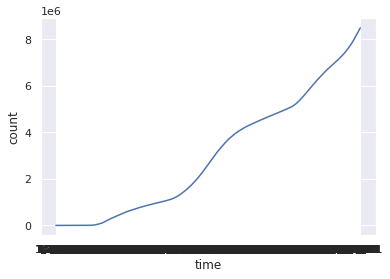

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")


# Plot the responses for different events and regions
sns.lineplot(x="time", y="count",
             data=df_russia)

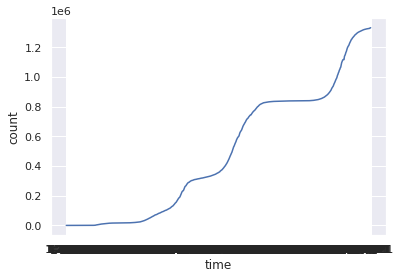

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")


# Plot the responses for different events and regions
sns.lineplot(x="time", y="count",
             data=df_israel)

In [ ]:
df_russia["diff"] = df_russia["count"].diff()
df_russia.loc["1/22/20", "diff"] = 0
df_russia

,count,time,Country/Region,diff
1/22/20,0,1/22/20,Russia,0
1/23/20,0,1/23/20,Russia,0
1/24/20,0,1/24/20,Russia,0
1/25/20,0,1/25/20,Russia,0
1/26/20,0,1/26/20,Russia,0
...,...,...,...,...
10/30/21,8338053,10/30/21,Russia,39203
10/31/21,8377984,10/31/21,Russia,39931
11/1/21,8417305,11/1/21,Russia,39321
11/2/21,8455232,11/2/21,Russia,37927


In [ ]:
df_israel["diff"] = df_israel["count"].diff()
df_israel.loc["1/22/20", "diff"] = 0
df_israel

,count,time,Country/Region,diff
1/22/20,0,1/22/20,Israel,0
1/23/20,0,1/23/20,Israel,0
1/24/20,0,1/24/20,Israel,0
1/25/20,0,1/25/20,Israel,0
1/26/20,0,1/26/20,Israel,0
...,...,...,...,...
10/30/21,1327126,10/30/21,Israel,384
10/31/21,1327458,10/31/21,Israel,332
11/1/21,1328218,11/1/21,Israel,760
11/2/21,1331597,11/2/21,Israel,3379


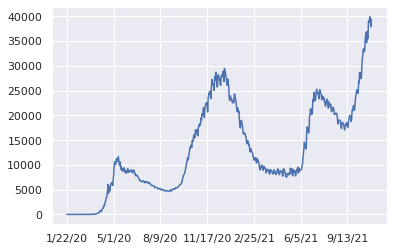

In [ ]:
df_russia["diff"].plot()

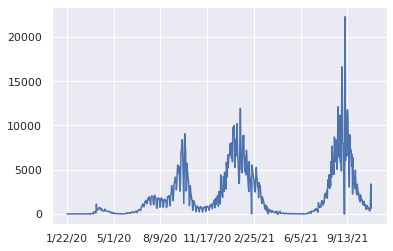

In [ ]:
df_israel["diff"].plot()

In [ ]:
df_russia["diff_diff"] = df_russia["diff"].diff()
df_russia.loc["1/22/20", "diff_diff"] = 0
df_russia

,count,time,Country/Region,diff,diff_diff
1/22/20,0,1/22/20,Russia,0,0
1/23/20,0,1/23/20,Russia,0,0
1/24/20,0,1/24/20,Russia,0,0
1/25/20,0,1/25/20,Russia,0,0
1/26/20,0,1/26/20,Russia,0,0
...,...,...,...,...,...
10/30/21,8338053,10/30/21,Russia,39203,398
10/31/21,8377984,10/31/21,Russia,39931,728
11/1/21,8417305,11/1/21,Russia,39321,-610
11/2/21,8455232,11/2/21,Russia,37927,-1394


In [ ]:
df_israel["diff_diff"] = df_israel["diff"].diff()
df_israel.loc["1/22/20", "diff_diff"] = 0
df_israel

,count,time,Country/Region,diff,diff_diff
1/22/20,0,1/22/20,Israel,0,0
1/23/20,0,1/23/20,Israel,0,0
1/24/20,0,1/24/20,Israel,0,0
1/25/20,0,1/25/20,Israel,0,0
1/26/20,0,1/26/20,Israel,0,0
...,...,...,...,...,...
10/30/21,1327126,10/30/21,Israel,384,-187
10/31/21,1327458,10/31/21,Israel,332,-52
11/1/21,1328218,11/1/21,Israel,760,428
11/2/21,1331597,11/2/21,Israel,3379,2619


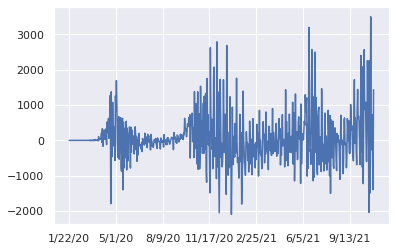

In [ ]:
df_russia["diff_diff"].plot()

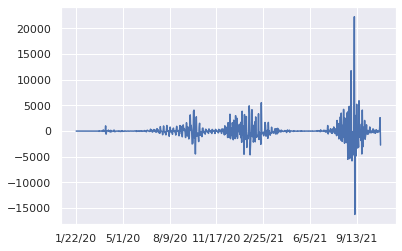

In [ ]:
df_israel["diff_diff"].plot()

**Работа с исходным рядом**

На семинаре начало новой волны мы детектировали через изменение дисперсии в разнице случаев с предыдущим днём. Но причин для роста дисперсии может быть много, например, сбои в работе лабораторий. Ваша задача состоит в том, чтобы детектировать новую волну коронавируса как можно скорее, но делать это на основе среднего изменения количества новых случаев.

Если начинается волна коронавируса, то новых случаев с каждым днём должно быть больше и больше. Соответственно, третий визуализированный временной ряд должен быть в положительной области. Но мы видим, что это не так, как раз из-за большой дисперсии. Но тем не менее в среднем изменения положительные, поэтому с помощью различия в средних тоже можно уловить изменение.

Для того, чтобы детектировать новую волну, будем использовать статистику CUSUM. Требуется выбрать распределения $\mathsf{P}_0$ и $\mathsf{P}_\infty$, а также порог статистики, при котором объявляется разладка. В качестве распределений возьмите нормальные распределения с различным средним, но с одинаковой дисперсией.

Подберите параметры на данных из Израиля, визуализируйте значения статистики.

In [ ]:
from scipy.stats import norm
loc = df_israel["diff_diff"].mean()
scale = np.sqrt(df_israel["diff_diff"].var())
p_0 = norm.pdf(df_israel["diff_diff"].to_numpy().tolist(), loc=2*loc, scale=scale)
p_inf = norm.pdf(df_israel["diff_diff"].to_numpy().tolist(), loc=loc, scale=scale)

In [ ]:
n = df_israel["diff_diff"].shape[0]
cusum = np.zeros(n)
for i in range(n):
  cumsum[i] = np.prod(p_0[:i]/p_inf[:i])
df_israel["cusum"] = cusum

In [ ]:
df_israel["cusum"] = cusum

In [ ]:
df_israel["threashold"] = 1.002

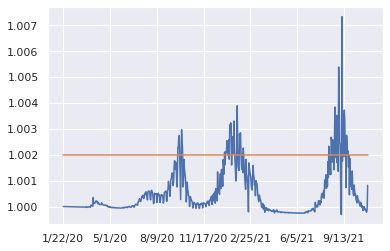

In [ ]:
df_israel["cusum"].plot()
df_israel["threashold"].plot()

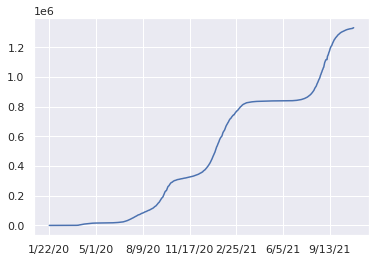

In [ ]:
df_israel["count"].plot()

С теми же параметрами на данных из России проверьте, с каким отставанием детектируются новые волны. Как ведёт себя статистика, когда волна коронавируса спадает?

In [ ]:
from scipy.stats import norm
loc = df_russia["diff_diff"].mean()
scale = np.sqrt(df_russia["diff_diff"].var())
p_0 = norm.pdf(df_russia["diff_diff"].to_numpy().tolist(), loc=2*loc, scale=scale)
p_inf = norm.pdf(df_russia["diff_diff"].to_numpy().tolist(), loc=loc, scale=scale)

In [ ]:
n = df_russia["diff_diff"].shape[0]
cusum = np.zeros(n)
for i in range(n):
  cusum[i] = np.prod(p_0[:i]/p_inf[:i])
df_russia["cumsum"] = cusum

In [ ]:
df_russia["cusum"] = cusum

In [ ]:
df_russia["threashold"] = 0.4

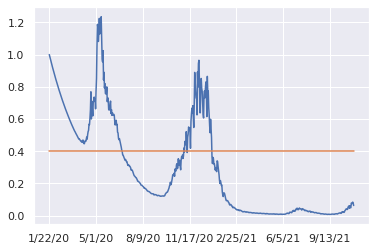

In [ ]:
df_russia["cusum"].plot()
df_russia["threashold"].plot()

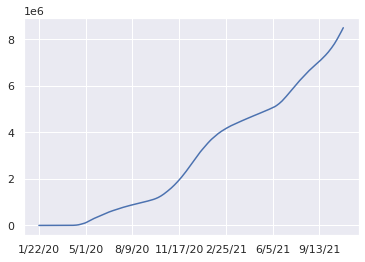

In [ ]:
df_russia["count"].plot()

Когда волна коронавируса спадает, статистика увеличивается

**Работа со сглаженным рядом**

Чтобы понизить уровень шума, стоит усреднить данные новых случаев с окном длиной в 7 дней и смотреть на разницу соседних значений уже в этом ряду. Изобразите теперь сглаженный ряд и разницы его соседних значений для России и Израиля, сделайте вывод.

Функция для сглаживания дана ниже, это частный случай свёртки.

In [ ]:
def smooth_ts(ts, n_points=7):
    """Сглаживает временной ряд"""
    return np.convolve(ts, np.ones(n_points) / n_points, mode='valid')

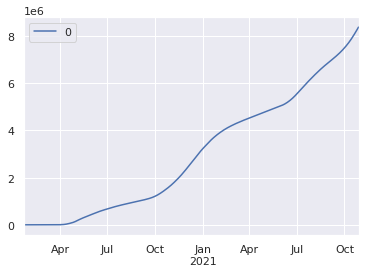

In [ ]:
count_russia_smooth = pd.DataFrame(smooth_ts(df_russia["count"]), index=pd.date_range("2020-01-22", "2021-10-28", freq="D"))
count_russia_smooth.plot()

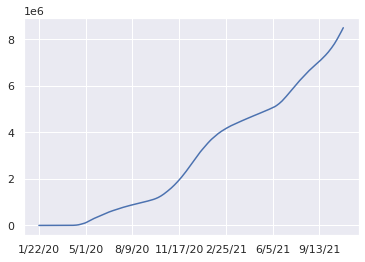

In [ ]:
df_russia["count"].plot()

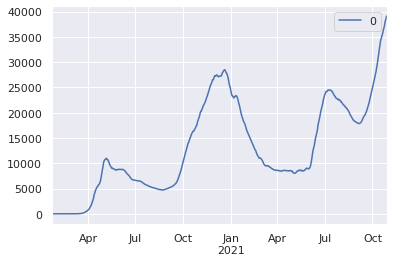

In [ ]:
diff_russia_smooth = count_russia_smooth.diff()
diff_russia_smooth.plot()

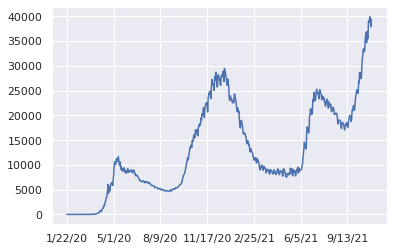

In [ ]:
df_russia["diff"].plot()

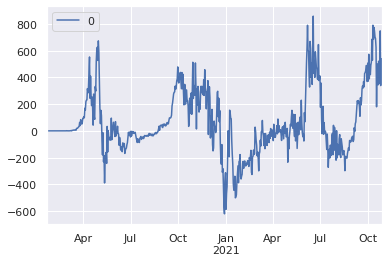

In [ ]:
diff_diff_russia_smooth = diff_russia_smooth.diff()
diff_diff_russia_smooth.plot()

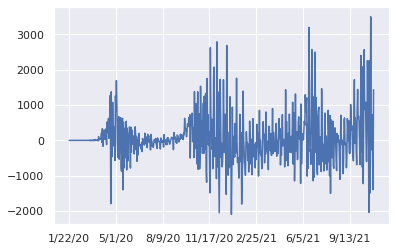

In [ ]:
df_russia["diff_diff"].plot()

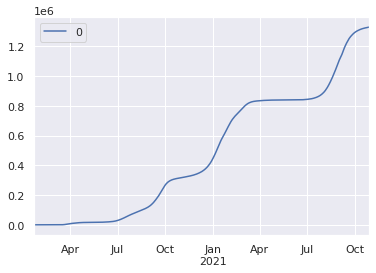

In [ ]:
count_israel_smooth = pd.DataFrame(smooth_ts(df_israel["count"]), index=pd.date_range("2020-01-22", "2021-10-28", freq="D"))
count_israel_smooth.plot()

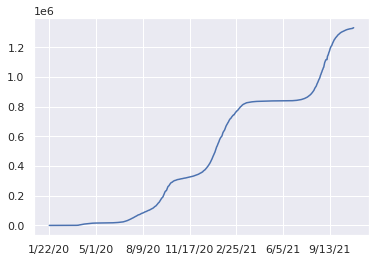

In [ ]:
df_israel["count"].plot()

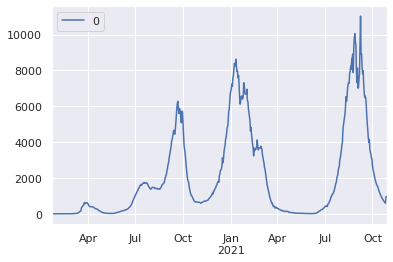

In [ ]:
diff_israel_smooth = count_israel_smooth.diff()
diff_israel_smooth.plot()

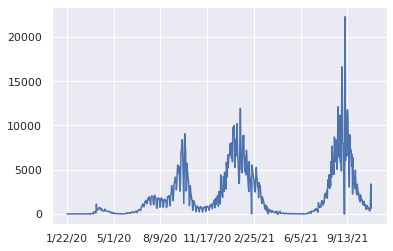

In [ ]:
df_israel["diff"].plot()

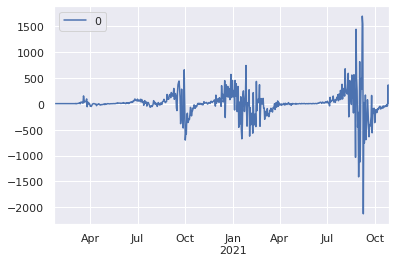

In [ ]:
diff_diff_israel_smooth = diff_israel_smooth.diff()
diff_diff_israel_smooth.plot()

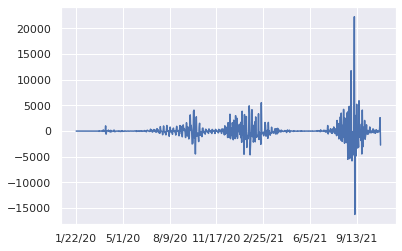

In [ ]:
df_israel["diff_diff"].plot()

Сглаживание ряда позволяет подавить шум, что позволяет уменьшить временные колебания и наблюдать основную тенденцию

Снова выберите распределения $\mathsf{P}_0$ и $\mathsf{P}_\infty$, а также порог статистики, при котором объявляется разладка. В качестве распределений возьмите нормальные распределения с различным средним, но с одинаковой дисперсией. Подберите параметры на данных из Израиля, визуализируйте значения статистики.

In [ ]:
from scipy.stats import norm
loc = diff_diff_israel_smooth.mean()
scale = np.sqrt(diff_diff_israel_smooth.var())
p_0 = norm.pdf(diff_diff_israel_smooth.to_numpy().tolist(), loc=2*loc, scale=scale)
p_inf = norm.pdf(diff_diff_israel_smooth.to_numpy().tolist(), loc=loc, scale=scale)

In [ ]:
n = diff_diff_israel_smooth.shape[0]
cusum = np.zeros(n)
for i in range(n):
  cusum[i] = np.prod(p_0[2:i]/p_inf[2:i])
cusum_israel_smooth = pd.DataFrame(cusum, index = diff_diff_israel_smooth.index)

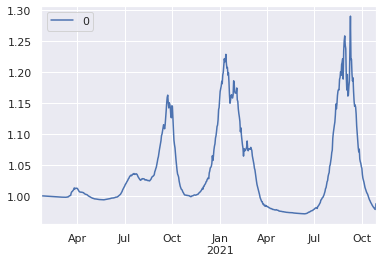

In [ ]:
cusum_israel_smooth.plot()

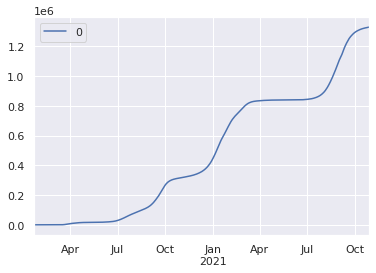

In [ ]:
count_israel_smooth.plot()

In [ ]:
from scipy.stats import norm
loc = diff_diff_russia_smooth.mean()
scale = np.sqrt(diff_diff_russia_smooth.var())
p_0 = norm.pdf(diff_diff_russia_smooth.to_numpy().tolist(), loc=2*loc, scale=scale)
p_inf = norm.pdf(diff_diff_russia_smooth.to_numpy().tolist(), loc=loc, scale=scale)

In [ ]:
n = cusum_russia_smooth.shape[0]
cusum = np.zeros(n)
for i in range(n):
  cusum[i] = np.prod(p_0[2:i]/p_inf[2:i])
cusum_russia_smooth = pd.DataFrame(cusum, index = diff_diff_russia_smooth.index)

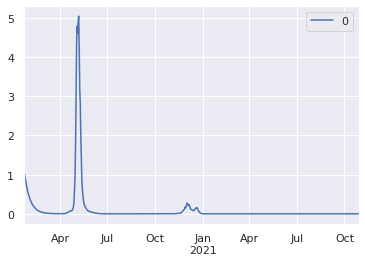

In [ ]:
cusum_russia_smooth.plot()

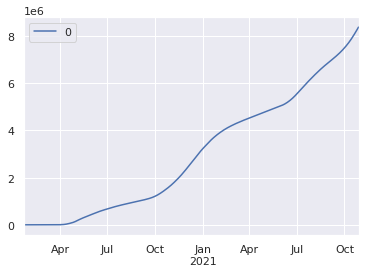

In [ ]:
count_russia_smooth.plot()

Сравните полученные методы определения разладки с методом определения по дисперсии.

**Вывод:**

Полученные методы позволяют уменьшить задержку обнаружения разладки по сравнению с методами оперделения по дисперсии. Также изменение дисперсии может быть вызвано внешними факторами, что приведет к ложному детектированию разладки

Проведите аналогичное исследование со статистикой Ширяева-Робертса.

In [ ]:
from scipy.stats import norm
loc = df_israel["diff_diff"].mean()
scale = np.sqrt(df_israel["diff_diff"].var())
p_0 = norm.pdf(df_israel["diff_diff"].to_numpy().tolist(), loc=2*loc, scale=scale)
p_inf = norm.pdf(df_israel["diff_diff"].to_numpy().tolist(), loc=loc, scale=scale)

In [ ]:
n = df_israel["diff_diff"].shape[0]
sh_rob = np.zeros(n)
for i in range(n):
  sh_rob[i] = 0
  for theta in range(n):
    sh_rob[i] += np.prod(p_0[theta:i]/p_inf[theta:i])
df_israel["sh_rob"] = sh_rob

In [ ]:
df_israel["threashold"] = 652.3

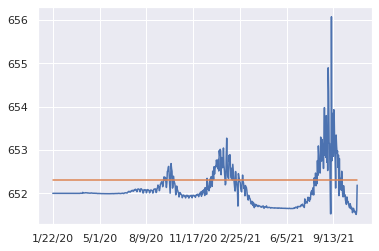

In [ ]:
df_israel["sh_rob"].plot()
df_israel["threashold"].plot()

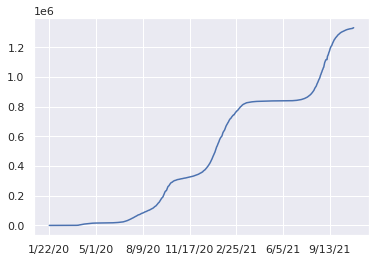

In [ ]:
df_israel["count"].plot()

In [ ]:
from scipy.stats import norm
loc = df_russia["diff_diff"].mean()
scale = np.sqrt(df_russia["diff_diff"].var())
p_0 = norm.pdf(df_russia["diff_diff"].to_numpy().tolist(), loc=2*loc, scale=scale)
p_inf = norm.pdf(df_russia["diff_diff"].to_numpy().tolist(), loc=loc, scale=scale)

In [ ]:
n = df_russia["diff_diff"].shape[0]
sh_rob = np.zeros(n)
for i in range(n):
  sh_rob[i] = 0
  for theta in range(n):
    sh_rob[i] += np.prod(p_0[theta:i]/p_inf[theta:i])
df_russia["sh_rob"] = sh_rob

In [ ]:
df_russia["threashold"] = 500

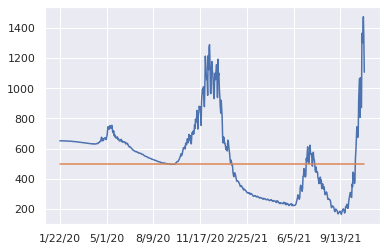

In [ ]:
df_russia["sh_rob"].plot()
df_russia["threashold"].plot()

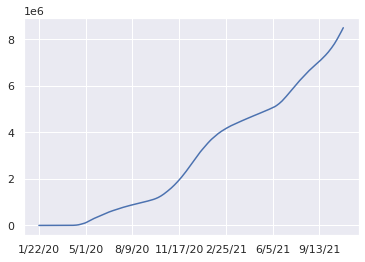

In [ ]:
df_russia["count"].plot()

### Задача 3

С учётом полученных знаний по нейронным сетям, доделайте нейросетевую часть ДЗ1